<h1>Маркетинговый анализ развлекательного приложения Procrastinate Pro+</h1>
<br>
<strong> Описание проекта</strong>
<br>
<strong>
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
</strong><ul>
    <li>лог сервера с данными об их посещениях</li>
    <li>выгрузка их покупок за этот период</li>
    <li>рекламные расходы</li>
</ul>
<strong>Предстоит изучить:</strong>
<ul>
    <li>откуда приходят пользователи и какими устройствами они пользуются</li>
    <li>сколько стоит привлечение пользователей из различных рекламных каналов</li>
    <li>сколько денег приносит каждый клиент</li>
    <li>когда расходы на привлечение клиента окупаются</li>
    <li>какие факторы мешают привлечению клиентов</li> 
    </ul>

<span style="font-size: 18px;"> 
<strong>
    Описание данных
</strong>
</span>

В вашем распоряжении три датасета.<br><br>
 `visits_info_short.csv`- хранит лог сервера с информацией о посещениях сайта.<br>
 `orders_info_short.csv` — информацию о заказах.<br>
 `costs_info_short.csv` — информацию о расходах на рекламу.<br>

Структура visits_info_short.csv:<br><br>
`User Id` — уникальный идентификатор пользователя<br>
`Region` — страна пользователя<br>
`Device` — тип устройства пользователя<br>
`Channel` — идентификатор источника перехода<br>
`Session Start` — дата и время начала сессии<br>
`Session End` — дата и время окончания сессии<br><br>
Структура orders_info_short.csv:<br><br>
`User Id` — уникальный идентификатор пользователя<br>
`Event Dt` — дата и время покупки<br>
`Revenue` — сумма заказа<br><br>
Структура costs_info_short.csv:<br><br>
`dt` — дата проведения рекламной кампании<br>
`Channel` — идентификатор рекламного источника<br>
`costs` — расходы на эту кампанию<br>

<span style="font-size: 18px;"> 
<strong>
    План проекта
</strong>
</span>

<ol>
    <li>Предварительный анализ данных</li><br>
    <li>Задание функции для расчёта и анализа LTV, ROI, удержания и конверсии</li><br>
    <li>Исследовательский анализ данных</li><br>
    <li>Маркетинг</li><br>
    <li>Оценка окупаемости рекламы</li><br>
    <li>Общие выводы</li><br>
</ol>

### Предварительный анализ данных

In [1]:
# Импортируем библиотеки
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Установка максимального количества отображаемых столбцов
pd.set_option('display.max_columns', None)

<span style="font-size: 15px;"> 
<strong>
    Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
</strong>
</span>

In [3]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

<span style="font-size: 15px;"> 
<strong>
    Oзнакомимся с таблицeй visits
</strong>
</span>


In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
print(f'Общее количество явных дубликатов в таблице visits: {visits.duplicated().sum()}')

Общее количество явных дубликатов в таблице visits: 0


<span style="font-size: 15px;"> 
<strong>
    Oзнакомимся с таблицeй orders
</strong>
</span>

In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
print(f'Общее количество явных дубликатов в таблице orders: {orders.duplicated().sum()}')

Общее количество явных дубликатов в таблице orders: 0


<span style="font-size: 15px;"> 
<strong>
    Oзнакомимся с таблицeй costs
</strong>
</span>

In [10]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
print(f'Общее количество явных дубликатов в таблице costs: {orders.duplicated().sum()}')

Общее количество явных дубликатов в таблице costs: 0


Приведем названия столбцов к нижнему регистру и snake_case

In [13]:
for df in [visits, orders, costs]:
    df.columns = df.columns.str.lower().str.replace(' ', '_')

Приведем столбцы содержащие дату к типу datetime

In [14]:
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)
orders.event_dt = pd.to_datetime(orders.event_dt)
costs.dt = pd.to_datetime(costs.dt)

<strong>Вывод :</strong> 
<br> <ul>
<li> Данные не содержат явных дубликатов </li>
<li> Названия столбцов приведены к нижнему и змеиному регистру </li>
<li> Столбцы содержащие дату приведены к типу datetime </li> 
</ul>

### Задание функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция get_profiles()

In [15]:
def get_profiles(visits, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['dt'] = profiles['first_ts'].dt.date  
    profiles['month'] = profiles['first_ts'].dt.month  

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs['dt'] = ad_costs['dt'].dt.date
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция get_retention()

In [16]:
def get_retention(
    profiles,
    visits_info_short,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits_info_short[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция get_conversion()

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция get_ltv()

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция filter_data()

In [19]:
#Для сглаживания dataframe
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция plot_retention()

In [20]:
# Визуализация удержания клиентов
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция plot_conversion()

In [21]:
# Функция построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция plot_ltv_roi()

In [22]:
# Функция для визуализации LTV и ROI
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции реализованы, в дальнейшем их использование будет облегчать нам работу и использовать все возможности функционального программирования.

### Исследовательский анализ данных

#### Составляем профили пользователей. Определяем минимальную и максимальную даты привлечения пользователей.

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769


In [24]:
print(f'Минимальная дата привлечения пользователей: {profiles.first_ts.min().date()}')

Минимальная дата привлечения пользователей: 2019-05-01


In [25]:
print(f'Максимальная дата привлечения пользователей: {profiles.first_ts.max().date()}')

Максимальная дата привлечения пользователей: 2019-10-27


#### Выясняем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [26]:
country_payers_table = pd.pivot_table(profiles, index='region', columns='payer',
                                      values='user_id', aggfunc='nunique', fill_value=0)

In [27]:
country_payers_table['total_users'] = country_payers_table.sum(axis=1)

In [28]:
country_payers_table['payers_part'] = (country_payers_table[True] / country_payers_table['total_users']).round(3)*100

Отсортируем таблицу по доле платных пользователей

In [29]:
country_payers_table.sort_values('payers_part', ascending=False)

payer,False,True,total_users,payers_part
region,,,,
United States,93100,6902,100002,6.9
Germany,14365,616,14981,4.1
UK,16875,700,17575,4.0
France,16787,663,17450,3.8


Отсортируем таблицу по доле всех пользователей

In [30]:
country_payers_table.sort_values('total_users', ascending=False)

payer,False,True,total_users,payers_part
region,,,,
United States,93100,6902,100002,6.9
UK,16875,700,17575,4.0
France,16787,663,17450,3.8
Germany,14365,616,14981,4.1


<br>Больше всего клиентов и самая высокая доля платных пользователей из США. У Германии меньше всего клиентов, но вторая доля платных пользователей. В Великобритании и Франции проживает примерно равное число пользователей, но для платящих пользователей выше в Великобритании.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Строим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [31]:
paying_users_device_pivot = pd.pivot_table(profiles, values='user_id', aggfunc='nunique',
                                           index='device', columns='payer', fill_value=0)

In [32]:
paying_users_device_pivot['total_users'] = paying_users_device_pivot.sum(axis=1)

In [33]:
paying_users_device_pivot['payers_part'] = (paying_users_device_pivot[True] /
                                            paying_users_device_pivot.total_users).round(3)*100

Отсортируем таблицу по доле платных пользователей

In [34]:
paying_users_device_pivot.sort_values('payers_part', ascending=False)

payer,False,True,total_users,payers_part
device,,,,
Mac,28130,1912,30042,6.4
iPhone,51097,3382,54479,6.2
Android,32982,2050,35032,5.9
PC,28918,1537,30455,5.0


Отсортируем таблицу по доле общих пользователей

In [35]:
paying_users_device_pivot.sort_values('total_users', ascending=False)

payer,False,True,total_users,payers_part
device,,,,
iPhone,51097,3382,54479,6.2
Android,32982,2050,35032,5.9
PC,28918,1537,30455,5.0
Mac,28130,1912,30042,6.4


<br> Наибольшая доля платящих пользователей приходится на Mac, чуть ниже идут пользователи iPhone, на третьем месте пользователи Android и нижнюю строку таблицы занимают пользователи PC.
<br> С точки зрения общего количества пользователей первой место занимают пользователи iPhone, второе пользователи Android, 
на третьем и четвертом местах - PC и Mac, с близким количеством пользователей.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
paying_sources_pivot = pd.pivot_table(profiles, values='user_id', aggfunc='nunique',
                                      index='channel', columns='payer', fill_value=0)

In [37]:
paying_sources_pivot['total_users'] = paying_sources_pivot.sum(axis=1)

In [38]:
paying_sources_pivot['payers_part'] = (paying_sources_pivot[True] /
                                            paying_sources_pivot.total_users).round(3)*100

Отсортируем таблицу по доле платных пользователей

In [39]:
paying_sources_pivot.sort_values('payers_part', ascending=False)

payer,False,True,total_users,payers_part
channel,,,,
FaceBoom,25587,3557,29144,12.2
AdNonSense,3440,440,3880,11.3
lambdaMediaAds,1924,225,2149,10.5
TipTop,17683,1878,19561,9.6
RocketSuperAds,4096,352,4448,7.9
WahooNetBanner,8100,453,8553,5.3
YRabbit,4147,165,4312,3.8
MediaTornado,4208,156,4364,3.6
LeapBob,8291,262,8553,3.1


Отсортируем таблицу по доле общих пользователей

In [40]:
paying_sources_pivot.sort_values('total_users', ascending=False)

payer,False,True,total_users,payers_part
channel,,,,
organic,55279,1160,56439,2.1
FaceBoom,25587,3557,29144,12.2
TipTop,17683,1878,19561,9.6
OppleCreativeMedia,8372,233,8605,2.7
LeapBob,8291,262,8553,3.1
WahooNetBanner,8100,453,8553,5.3
RocketSuperAds,4096,352,4448,7.9
MediaTornado,4208,156,4364,3.6
YRabbit,4147,165,4312,3.8


<strong> Вывод:</strong> <br>
<br>Самый большой процент платных пользователей приходит из FaceBoom(12.2 процента), второе место из AdNonSense(11.3 процента), третье место из lambdaMediaAds(10.5 процентов).
<br>Больше всего пользователей приходит естественным образом, но доля платных пользователей там самая низкая (2.1 процента), на втором месте по количеству пользователей  - FaceBoom, третье место по количеству занимает TipTop, с четвертым местом по доле платных пользователей (9.6 процентов)

### Маркетинг

#### Рассчитаем общую сумму расходов на маркетинг.

In [41]:
print(f'Общие расходы на маркетинг составили: {costs.costs.sum().round(3)}')

Общие расходы на маркетинг составили: 105497.3


#### Выясним, как траты распределены по рекламным источникам, сколько денег потратили на каждый источник.

In [42]:
sum_spent_by_channel = profiles.pivot_table(index='channel', values='acquisition_cost',
                                            aggfunc='sum').sort_values(by='acquisition_cost', ascending=False)
sum_spent_by_channel['costs_share'] = (sum_spent_by_channel['acquisition_cost'] / 
                                       profiles.acquisition_cost.sum()).round(3)*100
sum_spent_by_channel

,acquisition_cost,costs_share
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


Больше всего средств тратится на канал TipTop (51.9 процентов), на втором месте по доле расходов FaceBoom туда тратится (30.8 процентов), далее с большим отрывом идет WahooNetBanner(4.9 процентов).

#### Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [43]:
costs['dt'] = pd.to_datetime(costs['dt'])
# Таблица с недельной динамикой
weekly_costs_pivot = pd.pivot_table(costs, index=costs['dt'].dt.to_period('W'), 
                                    values='costs', columns='channel', aggfunc='sum', fill_value=0)
# Таблица с месячной динамикой
monthly_costs_pivot = pd.pivot_table(costs, index=costs['dt'].dt.to_period('M'), 
                                    values='costs', columns='channel', aggfunc='sum', fill_value=0)

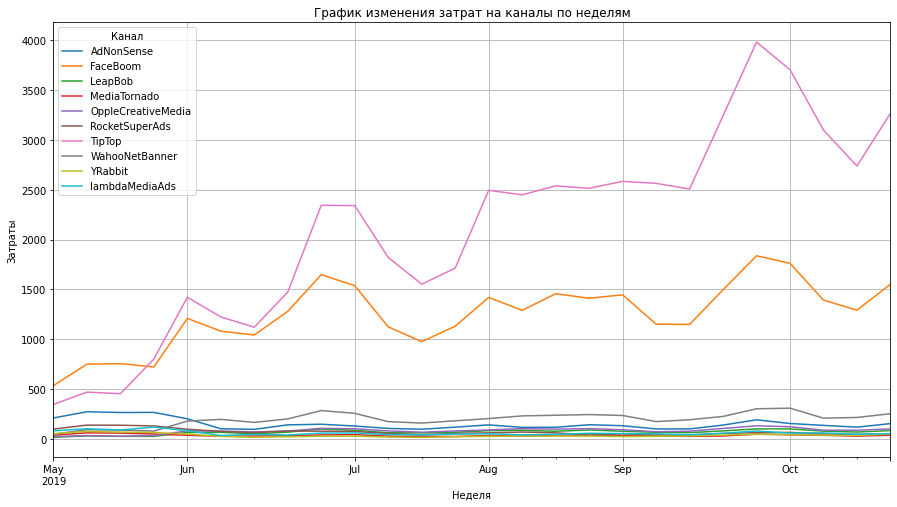

In [44]:
weekly_costs_pivot.plot(figsize=(15, 8), grid=True)
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.title('График изменения затрат на каналы по неделям')
plt.legend(title='Канал')
plt.show()

Видим рост затрат на продвижение по каналам TipTop и FaceBoom. Рост начинается с июня. По остальным каналам ситуация стабильна.

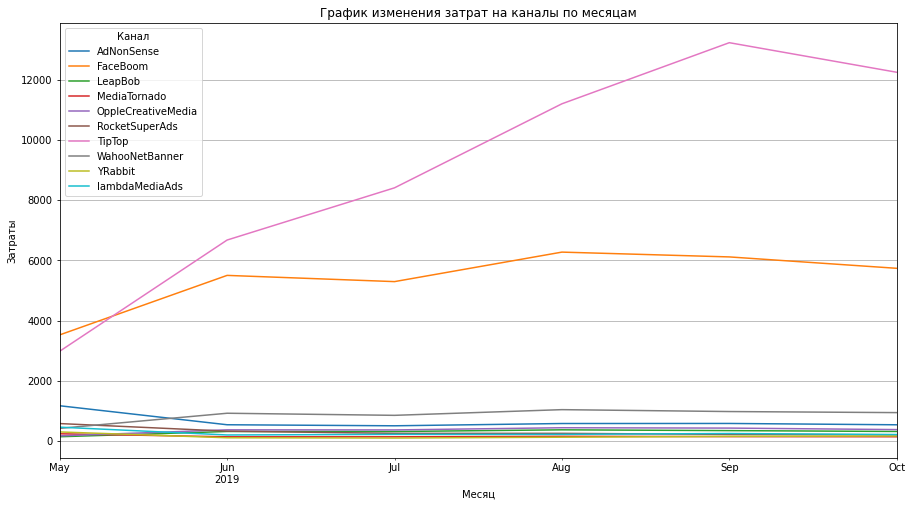

In [45]:
monthly_costs_pivot.plot(figsize=(15, 8), grid=True)
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.title('График изменения затрат на каналы по месяцам')
plt.legend(title='Канал')
plt.show()

Наблюдаем картину аналогичную графику выше только сглаженную по месяцам. Рост затрат на продвижение по каналам TipTop и FaceBoom

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [46]:
cac_table = sum_spent_by_channel.merge(paying_sources_pivot, on='channel', how='inner')
cac_table = cac_table[['acquisition_cost', 'total_users']]
cac_table['cac'] = (cac_table['acquisition_cost'] / cac_table['total_users']).round(2)
mean_cac = (cac_table["acquisition_cost"].sum() / cac_table["total_users"].sum()).round(2)
cac_table['mean_cac_percent_diff'] = ((cac_table['cac'] - mean_cac) / mean_cac).apply(lambda
                                                                                      x: f'{x:.2%}')
print(f'Среднее значение САС на одного пользователя = {mean_cac}')
print()
print(cac_table.sort_values('cac', ascending=False))


Среднее значение САС на одного пользователя = 0.7

                    acquisition_cost  total_users   cac mean_cac_percent_diff
channel                                                                      
TipTop                      54751.30        19561  2.80               300.00%
FaceBoom                    32445.60        29144  1.11                58.57%
AdNonSense                   3911.25         3880  1.01                44.29%
lambdaMediaAds               1557.60         2149  0.72                 2.86%
WahooNetBanner               5151.00         8553  0.60               -14.29%
RocketSuperAds               1833.00         4448  0.41               -41.43%
OppleCreativeMedia           2151.25         8605  0.25               -64.29%
MediaTornado                  954.48         4364  0.22               -68.57%
YRabbit                       944.22         4312  0.22               -68.57%
LeapBob                      1797.60         8553  0.21               -70.00%
organic      

Тройка самых дорогих каналов привлечения это: TipTop, FaceBoom и AdNonSense. Особенно выделяется TipTop, затраты на этот канал примерно в 2.5 раза превышают затраты на канал FaceBoom, идущий на втором месте.

<span style="font-size: 15px;"> 
<strong>
    Вывод по итогам маркетингового анализа:
</strong>
</span>
<ul>
    <li>Общая сумма затрат на привлечение пользователей составляет: 105497 условных единиц</li>
    <li>Из низ каналы TipTop и FaceBoom занимают около 82 % бюджета</li>
    <li>С периода: середина мая - начало июня, начался рост затрат на рекламное продвижение по каналам TipTop и FaceBoom, при сохранении затрат на продвижение по остальным каналам. </li>
    <li>Выявилась тройка самых дорогих для продвижения каналов: TipTop, FaceBoom и AdNonSense. Средний САС у которых на 300%, 58% и 44% соответственно, выше среднего по всем каналам.</li>
</ul>

### Оценим окупаемость рекламы


#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [47]:
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14 

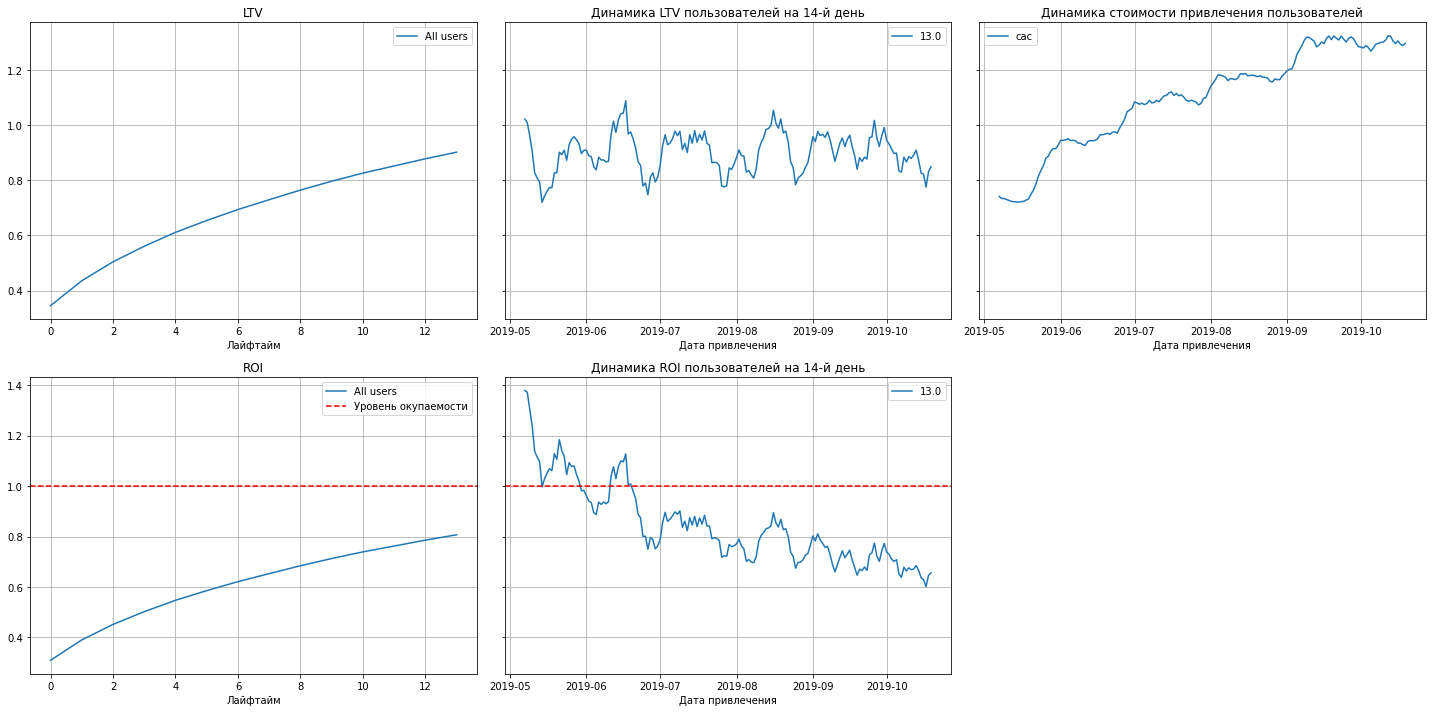

In [48]:
# Уберем из расчета пользователей, пришедших естественным образом
profiles_paid = profiles.query('channel != "organic"')
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_paid, orders, observation_date, horizon_days)
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days) 

- LTV стабильно растет
- Динамика стоимости привелечения клиентов резко вырастает с середины марта 2019 и стабилизируется на гораздо более высоком уровне в сентябре 2019г.
- ROI не дотягивает до единицы - реклама не окупается не смотря на рост затрат.
- С середины июня реклама стабильно перестает окупаться, убыток от вложений в рекламу начинает увеличиваться.

#### Проверим конверсию пользователей и динамику её изменения, удержание пользователей. Построим  графики конверсии и удержания.

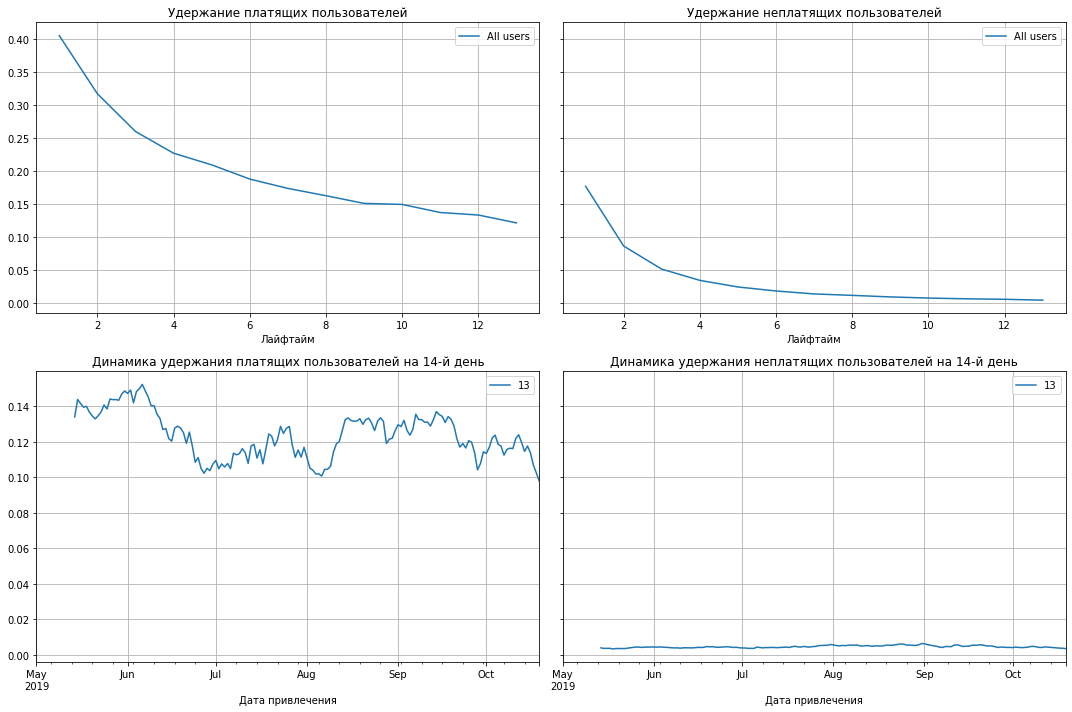

In [49]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date,
horizon_days)

plot_retention(result_grouped, result_in_time, horizon_days, window=14)

Удержание платных пользователей выше чем бесплатных, это нормальная ситуация, тут не видим ничего из ряда вон.

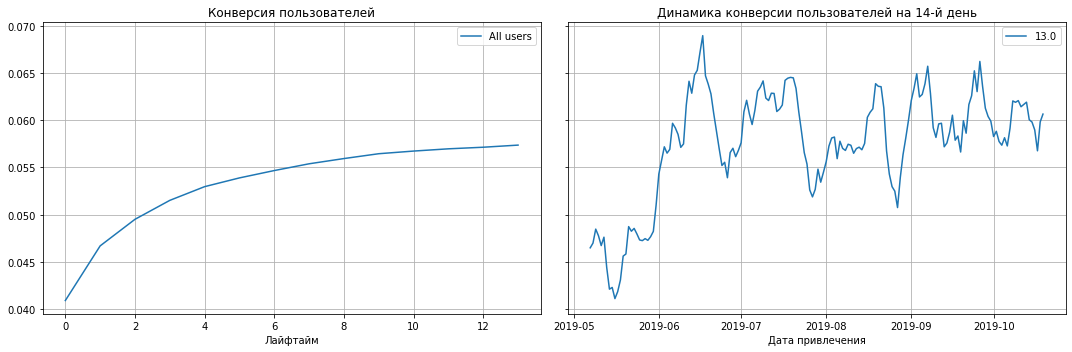

In [50]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date,
horizon_days)

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Конверсия всех пользователей около 0.57. Конверсия не убывающая, значит данные взяты правильно.

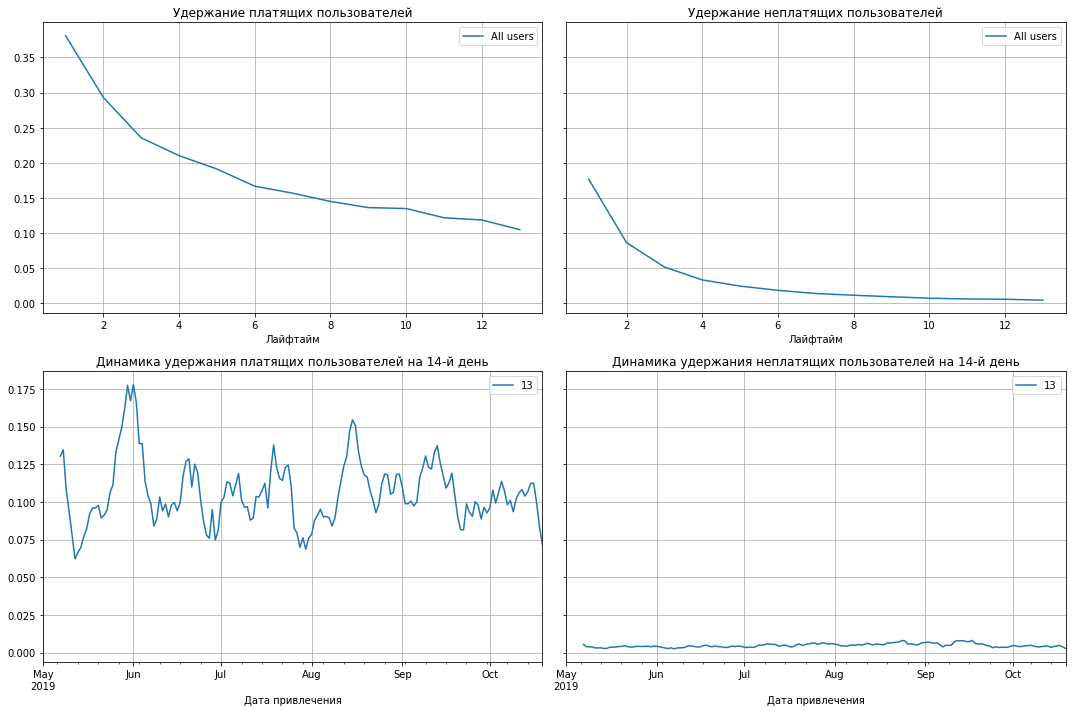

In [51]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles_paid, visits, observation_date, horizon_days)

plot_retention(result_grouped, result_in_time, horizon_days)

- Удержание платящих пользователей выше чем  не платящих, это нормально.
- Динамика удержания платящих пользователей на 14-й день достигала пика в начале июня 2019, затем опустилась ниже, уже более не показывала такой уровень удержания, был локальный пик роста в середине августа.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Построим графики конверсии с разбивкой по устройствам.

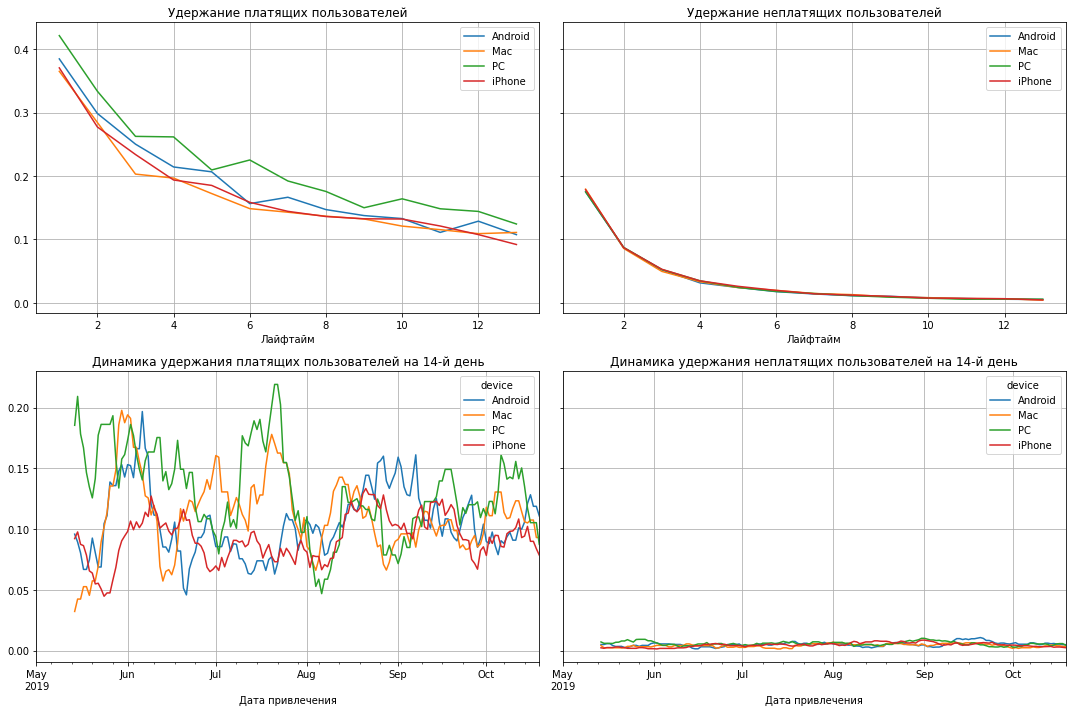

In [52]:
result_raw, result_grouped, result_in_time = get_retention(profiles_paid, visits, observation_date,
horizon_days, dimensions=['device'])

plot_retention(result_grouped, result_in_time, horizon_days, window=14)

Платные пользователи PC и Android удерживаются лучше чем пользователи Mac и iPhone. Уровень удержания органических пользователей примерно одинаков.

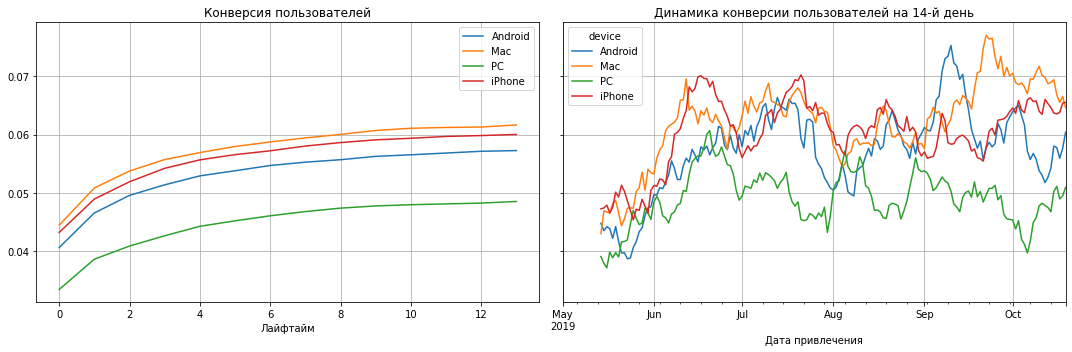

In [53]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date,
horizon_days, dimensions=['device'] )

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

Самая высокая конверсия у пользователей Mac и iPhone, у PC - самая низкая.

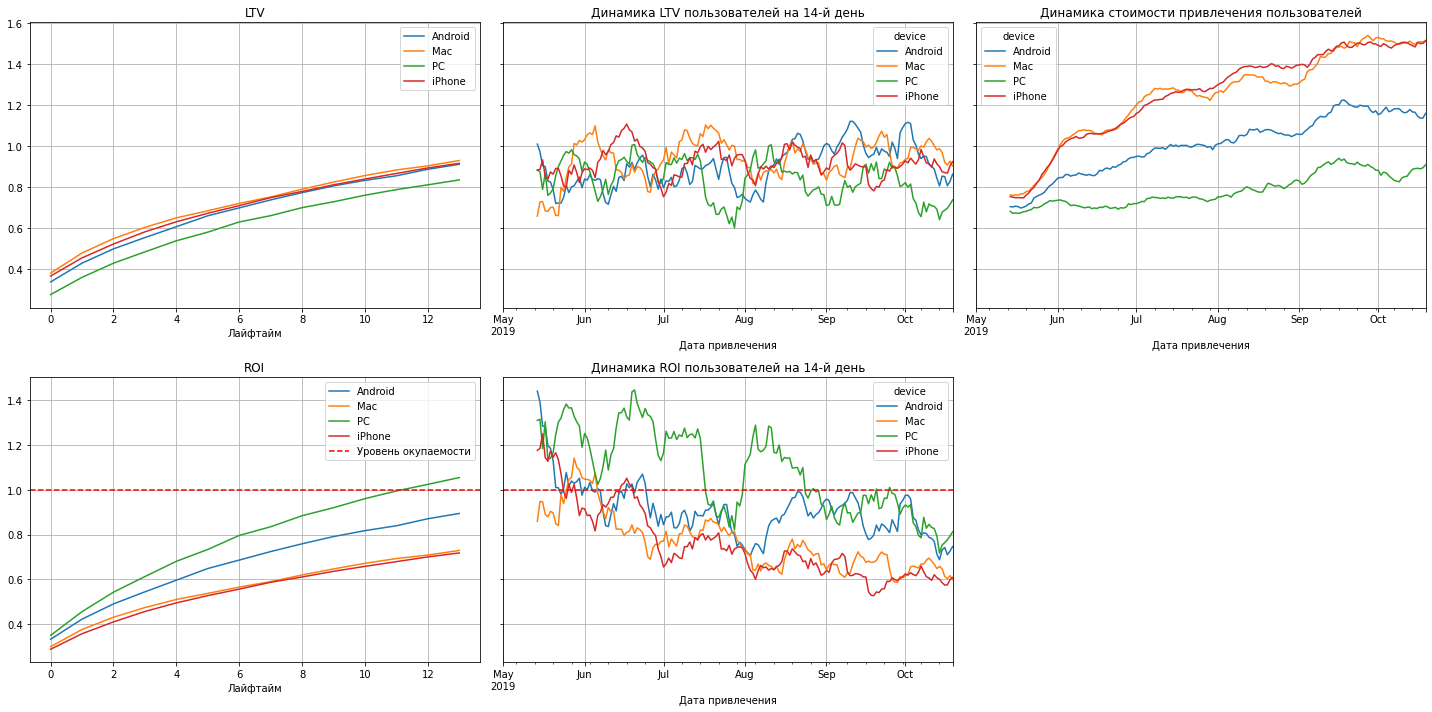

In [54]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14) 

- Судя по динамике расходы на рекламу сильно возрасли в наблюдаемый период, РС с ~ 0.7 по ~1.2, Android c ~ 0.7 по ~ 1.15, но больше всего - Mас и iPhone c ~ 0.75 по ~ 1.5 (Это уже почти двукратный рост!)
- Небольшая окупаемость, на момент анализа, есть по пользователям PC
- Реклама для пользователей Mac, iPhone и  Andriod практически не окупается с начала июня, со второй половины августа перестает окупаться реклама по всем видам устройств.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Построим графики конверсии по странам.

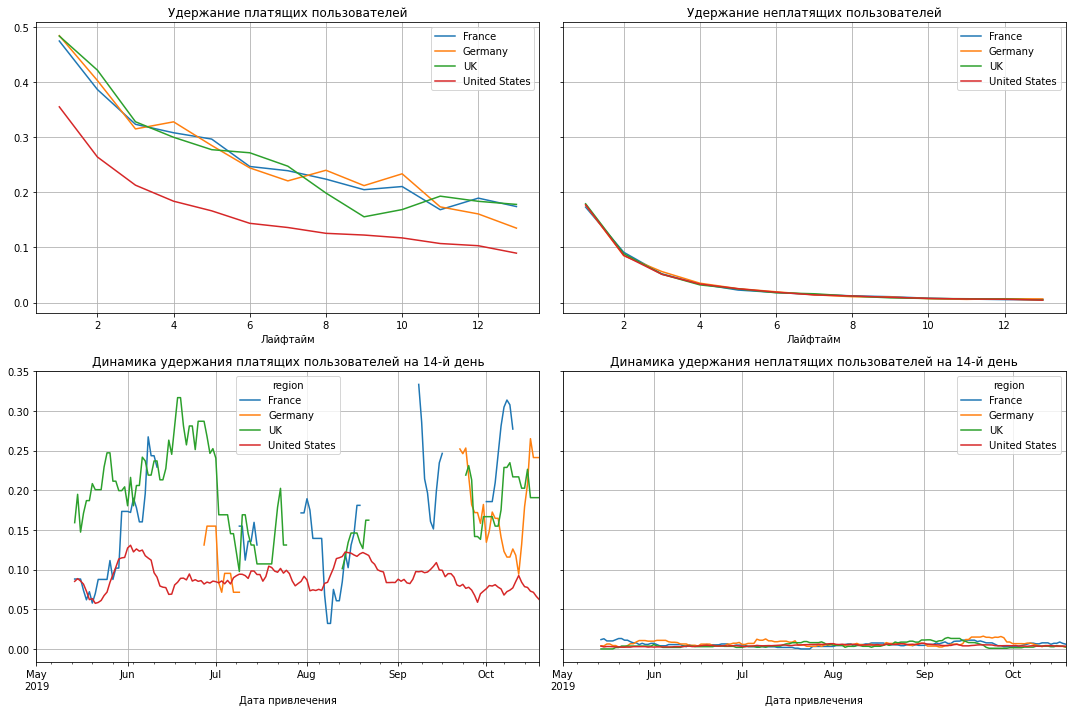

In [55]:
result_raw, result_grouped, result_in_time = get_retention(profiles_paid, visits, observation_date,
horizon_days, dimensions=['region'])

plot_retention(result_grouped, result_in_time, horizon_days, window=14)

Самое низкое удержание платных пользователей в США, по Европе уровень примерно одинаков.

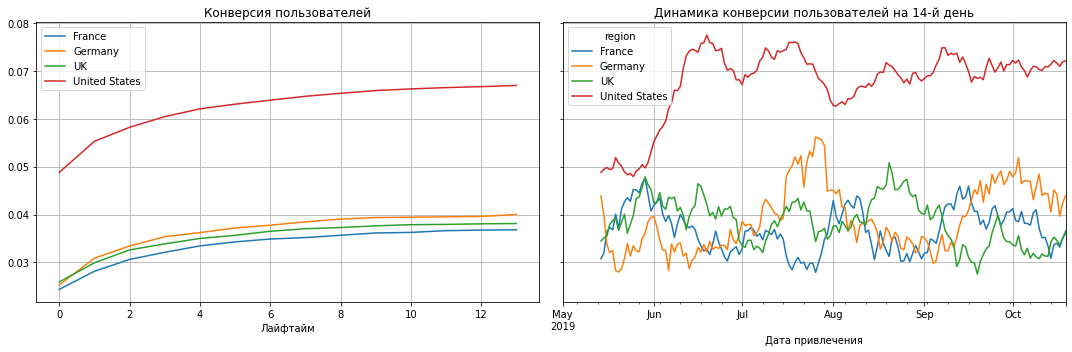

In [56]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date,
horizon_days, dimensions=['region'] )

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

Конверсия пользователей из США самая высокая, конверсия пользователей из Европы примерно на одном уровне, чуть выше у Германии, затем Великобритания, Франция на последнем месте.

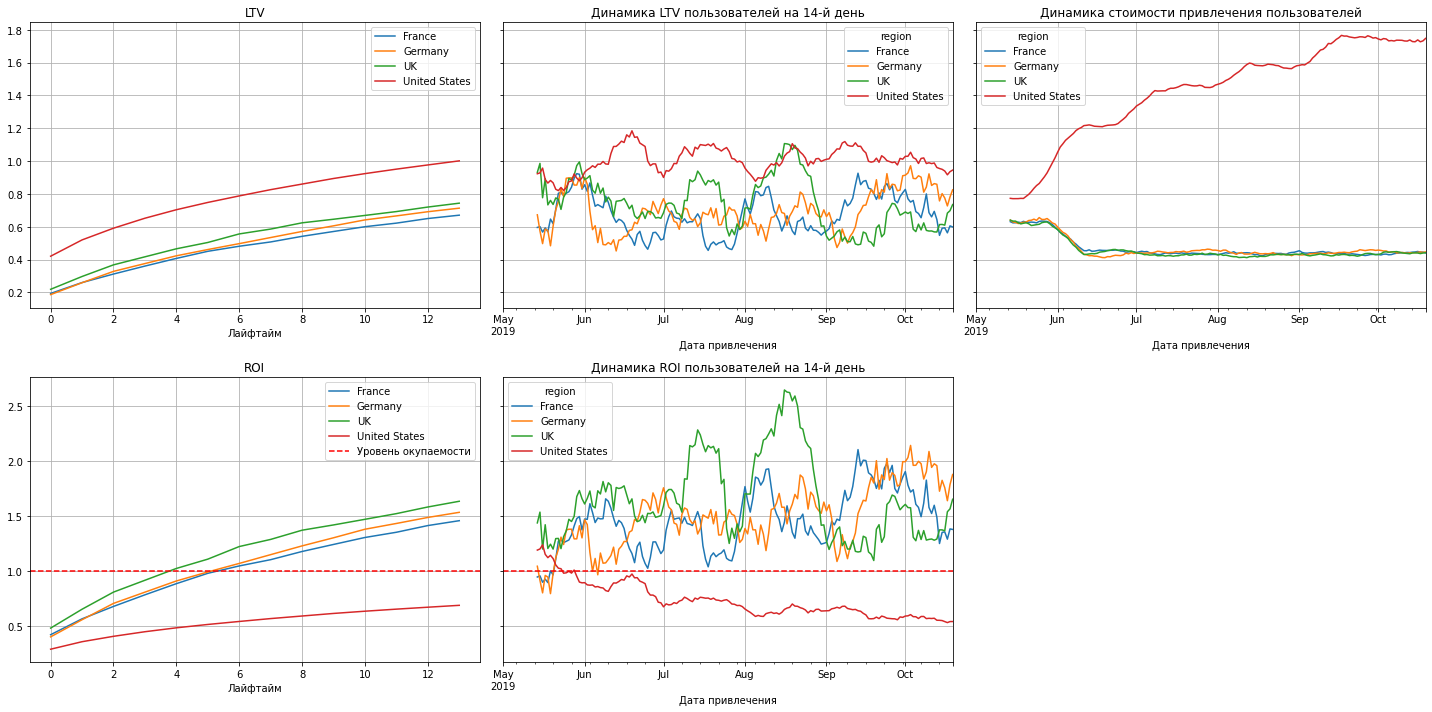

In [57]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14) 

- Видим примерно двукратное стоимости привлечения клиентов из США, начиная с июня. Это при снижении стоимости привлечения по остальным регионам.
- Вспомним, что пользователи из США примерно в 2.5 раза превосходят пользователей из всех остальных и вместе взятых регионов. Так же у пользователей из США, самый высокий процент платных пользователей.
- Реклама для пользователей из США не окупается, остальные регионы показывают прибыль от рекламных кампаний

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Построим графики конверсии с разбивкой по каналам.

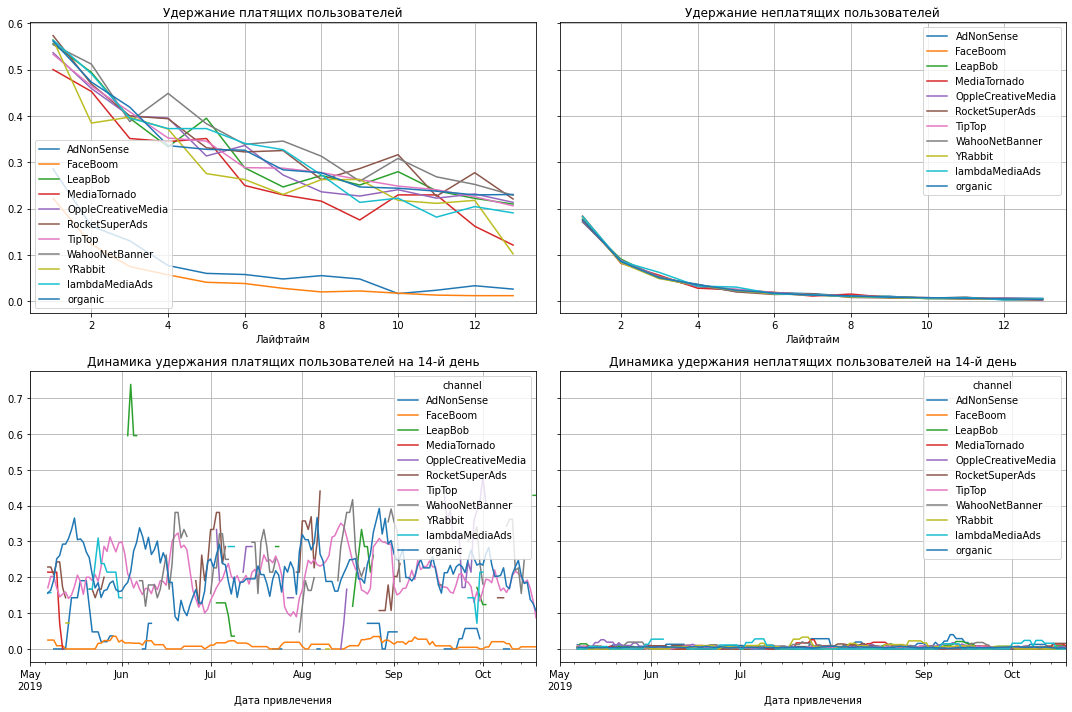

In [58]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date,
horizon_days, dimensions=['channel'])

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

Удержание платных пользователей выше чем бесплатных. Среди платных пользователей в удержании сильно проигрывают каналы AdNonSense и FaceBoom. Уровень удержания платных пользователей в остальных каналах примерно схоже по показателям.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ Видим причину не окупаемости каналов FaceBoom и AdNonSense.
</div>

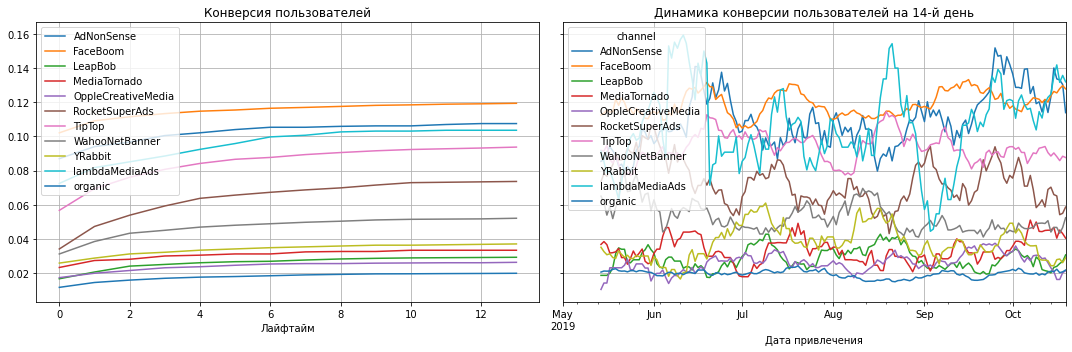

In [59]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date,
horizon_days, dimensions=['channel'] )

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

Самая высокая конверсия у канала FaceFoom, второе место - AdNonSence, третье у LambdaMediaAds. Самая низкая конверсия у пришедших естественным путем пользователей.

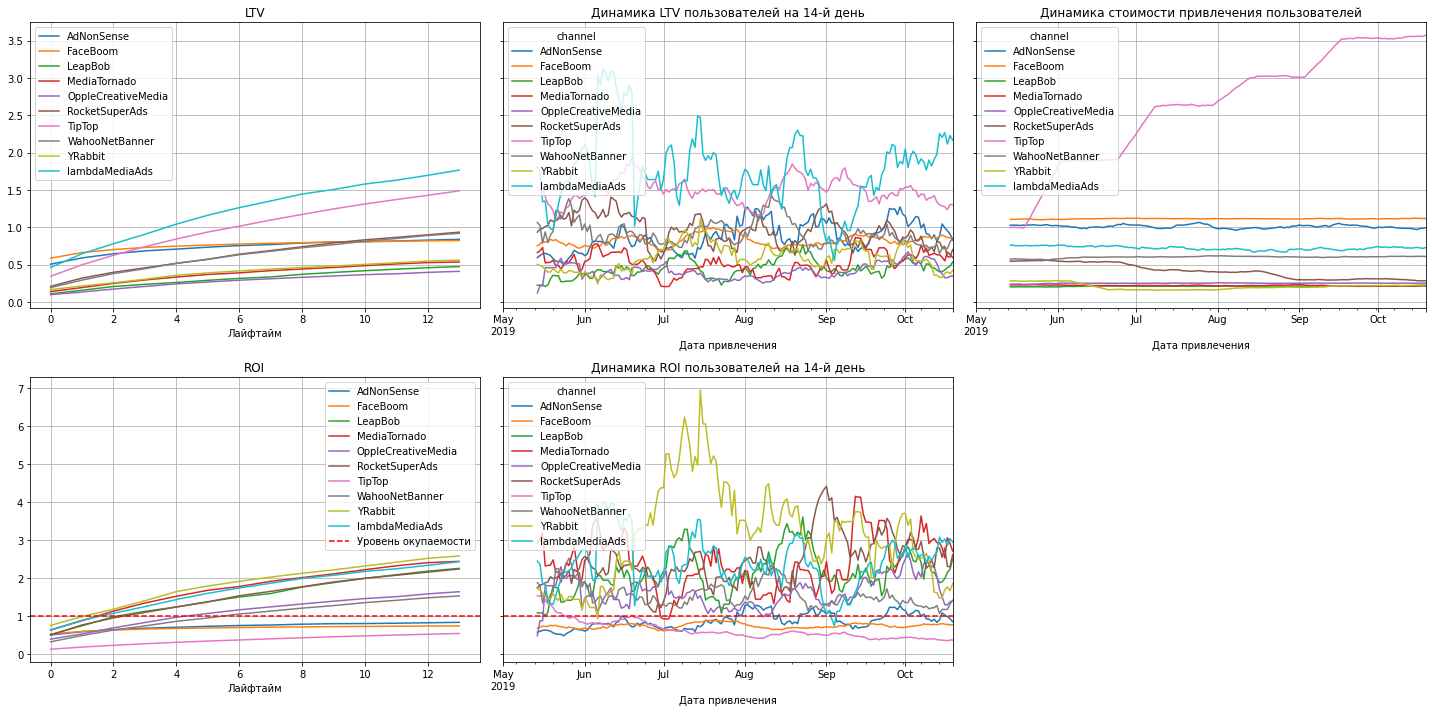

In [60]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    profiles_paid, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14) 

- Видим постоянный рост стоимости привлечения по каналу TipTop, рост стоимости привлечения через этот канал с  серидины мая по октябрь составил ~ 3.5 раза. Стоимость привлечения по остальным каналам стабильна.
- На графике ROI видны три канала, через которые не окупаются инвестиции в привлечение пользователей, это: AdNonSense, FaceBoom и TipTop

Проверим все ли каналы работают во всех регионах.

In [61]:
channel_region_pivot = profiles_paid.pivot_table(index=['channel', 'region'], values='user_id', aggfunc='count')
channel_region_pivot.sort_values('region', ascending=False)

,,user_id
channel,region,
MediaTornado,United States,4364
YRabbit,United States,4312
FaceBoom,United States,29144
TipTop,United States,19561
RocketSuperAds,United States,4448
OppleCreativeMedia,UK,3052
WahooNetBanner,UK,3003
lambdaMediaAds,UK,758
LeapBob,UK,3046


Видим, что в Европе и США, работают разные каналы, они не пересекаются. То есть FaceBoom и TipTop представлены только в США, а AdNonSense только в Европе.

#### Проанализируем альтернативную окупаемость рекламы с разбивкой по рекламным каналам, удалив убыточные каналы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Построим графики конверсии с разбивкой по каналам.

Проверим окупаемость рекламы при исключении убыточных источников в США (FaceBoom и TipTop). Так же уберем источник из Европы - AdNonSense.

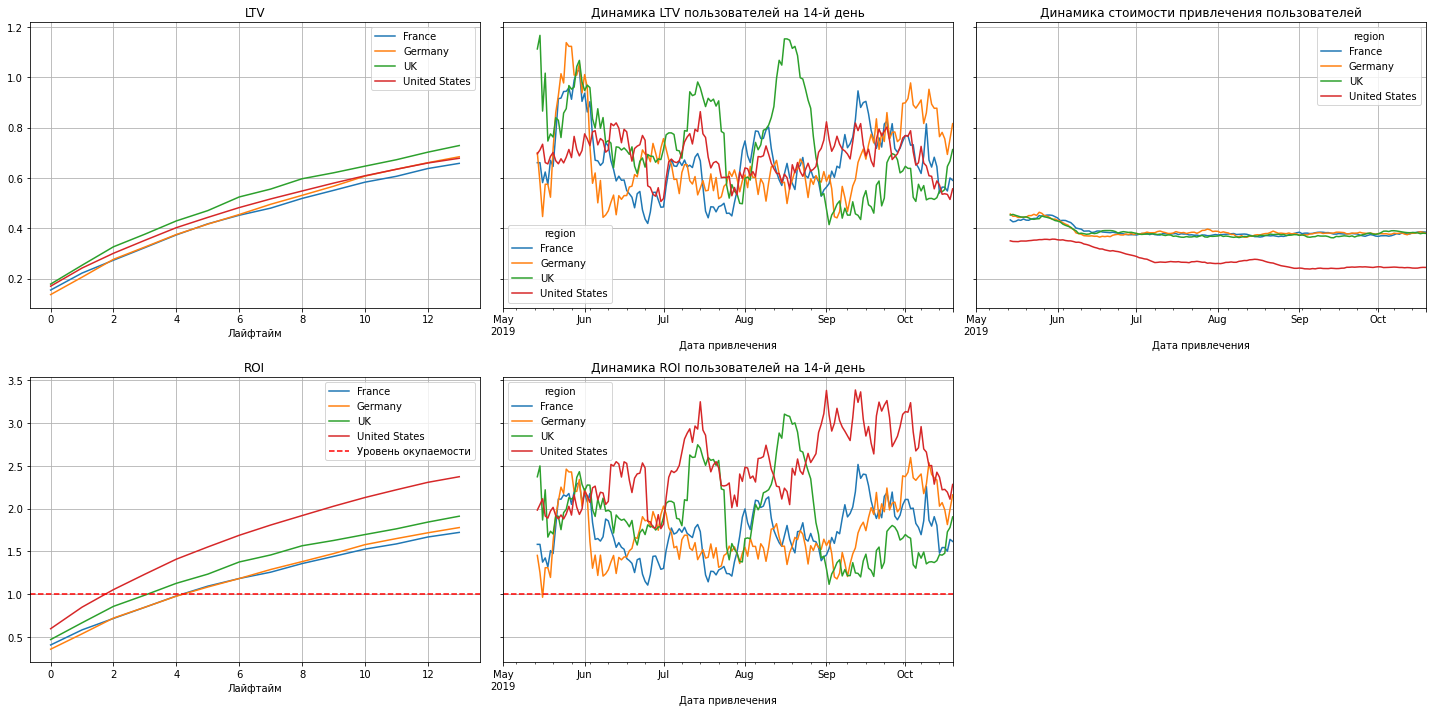

In [62]:
no_loss_channels = profiles_paid[(profiles_paid.channel != 'FaceBoom')&
                                   (profiles_paid.channel != 'TipTop')&
                                   (profiles_paid.channel != 'AdNonSense')]
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    no_loss_channels, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14) 

Видим, что после удаления убыточных источников рекламы, ROI США стремительно растет и превосходит остальные страны,  стоимость привлечения потребителей и США, при отсутствии неэффективных каналов, гораздно ниже чем в Европе. Общий график окупаемости независимо от регионов и устройств, тоже показывает хороший результат.При таком раскладе самый высокий LTV у Великобритании. Стомость привелечени клиентов из США становится самой низкой. Окупаемость рекламы в США становится самой высокой, ROI выходит в плюс на второй день лайфтама.

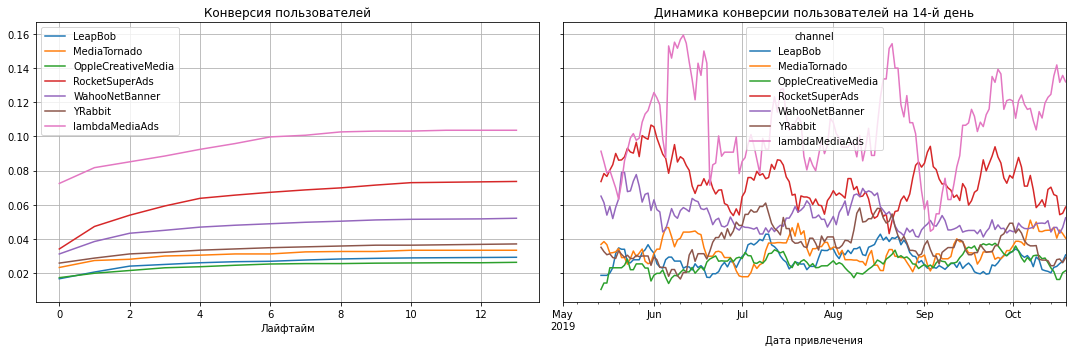

In [63]:
result_raw, result_grouped, result_in_time = get_conversion(no_loss_channels, orders, observation_date,
horizon_days, dimensions=['channel'] )

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

Лучшую конверсию показывают LambdaMediaAds - Европа, RocketSuperAds - США, WahooNetBanner - Европа.

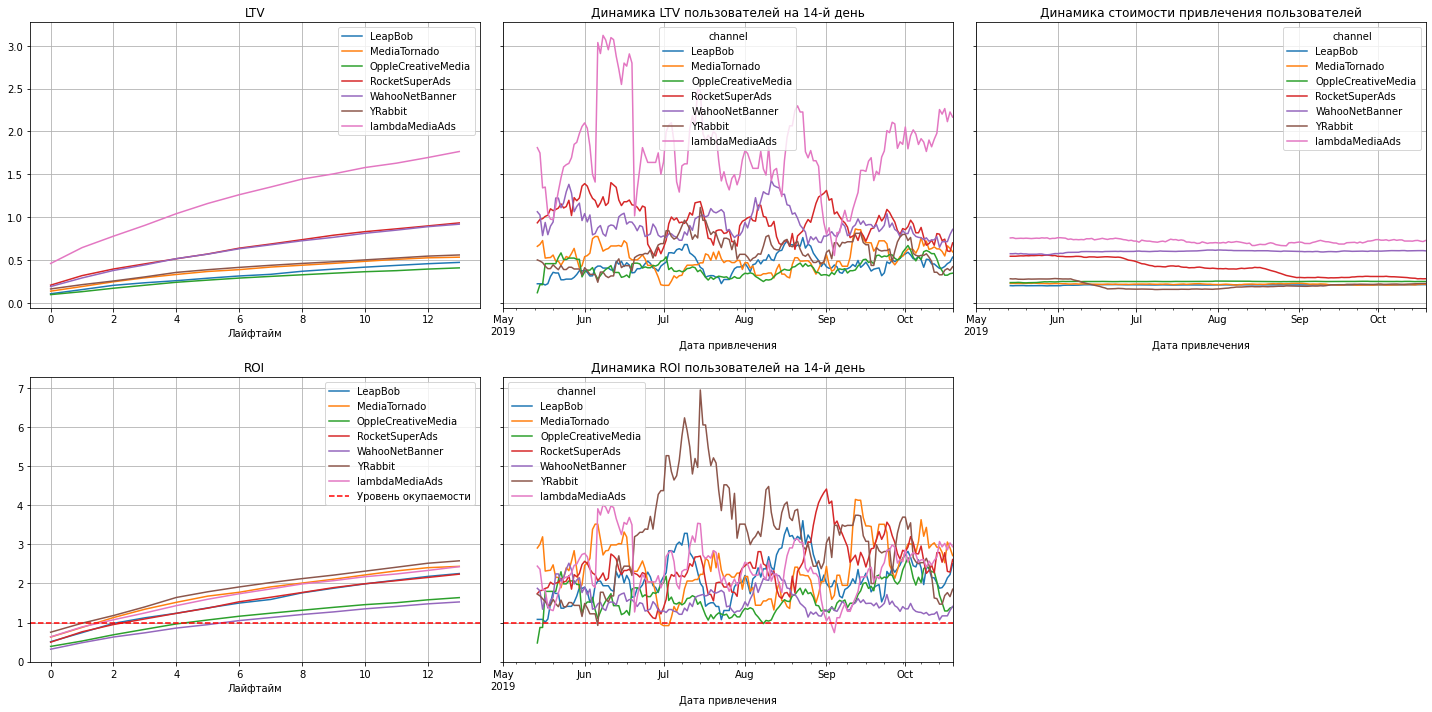

In [64]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
    no_loss_channels, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14) 

Самый высокий LTV у lambdaMediaAds, второе место RocketSuperAds, третье WahooNetBanner. Худшая позиция у OppleCreativeMedia. 
Тройка каналов с самой высокой окупаемостью: YRabbit, MediaTornado, lambdaMediaAds. Самая низкая окупаемость у OppleCreativeMedia WahooNetBanner.

Для удобства выведем список каналов отсортированных по LTV.

In [65]:
result_grouped[12.0].sort_values(ascending=False)

channel
lambdaMediaAds        1.695861
RocketSuperAds        0.898586
WahooNetBanner        0.889472
YRabbit               0.546287
MediaTornado          0.526256
LeapBob               0.457608
OppleCreativeMedia    0.395017
Name: 12.0, dtype: float64

Для удобства выведем список каналов отсортированных по ROI.

In [66]:
roi_grouped[12.0].sort_values(ascending=False)

channel
YRabbit               2.516446
MediaTornado          2.402610
lambdaMediaAds        2.331922
LeapBob               2.179087
RocketSuperAds        2.152657
OppleCreativeMedia    1.580649
WahooNetBanner        1.477881
Name: 12.0, dtype: float64

#### Резюмируем пункт по рекламной окупаемости

<strong>Окупается ли реклама, направленная на привлечение пользователей в целом?</strong>


   

В целом реклама стабильно перестала окупаться с середины июня. После роста расходов на рекламу по всем фронтам.

<strong>Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?</strong>




Среди устройств наилучшая окупаемость среди пользователей PC, хотя с августа она начинает снижаться. Среди всех регионов не окупается только реклама в США, остальные регионы приносят прибыль от рекламных компаний. Но ключевая проблема тут не в устройстве или стране, основное негативное влияние оказывают три убыточных рекламных канала: AdNonSense, FaceBoom и  в особенности TipTop.

<strong>Чем могут быть вызваны проблемы окупаемости?</strong>

Главная проблема окупаемости находится убыточных каналах продвижения нашего приложения. Если рассматривать окупаемость без убыточных источников продвижения ситуация становится гораздо лучше.

### Общие выводы

Выделим причины неэффективности привлечения пользователей.
<br>
<ul>Два самых больших по вложенному бюджету в рекламу канала: FaceBoom и TipTop дают нам отрицательный результат. Эти каналы вместе занимают ~ 82% общего рекламного бюджета.
    <ul><br>
        <li>FaceBoom хорошая конверсия, но низкое удержание клиентов и очень высокая цена рекламы, делающая рекламу не выгодной.</li>
        <li>TipTop хорошая конверсия и удержание. Но слишком высокая стоимость, делающая убыточными рекламные кампании через этот канал. CAC по этому каналу в четыре раза превышает средний.</li>
    </ul>
</ul>

Канал AdNonSense занимающий долю 3.7% от общих расходов не рекламу тоже неэффективен. Этот канал дает хорошую конверсию, но низкое удержание клиентов и он не окупается по текущей цене рекламы.
<br>
<br>
Итого около 86% рекламного бюджета приложения тратится на рекламу в каналах, дающих отрицательный финансовый результат.

Главная причина это очень большая ставка на не верные каналы продвижения, которые возможно охватывают не подходящюю целевую аудиторию, возможно берут слишком высокое вознаграждение за свои услуги, а возможно сама реклама там некачественна или не заметна потенциальному клиенту.

Рекомендации для отдела маркетинга:
<br>
<ul> 
    <li>Диверсификация рекламных каналов, то есть более равномерное распределения рекламного бюджета по каналам, в примерно равных долях. Возможно увеличение доли для самых эффективных каналов:</li>
    <br>  
  <ul>
    <li>Для США это: RocketSuperAds (высокий конверсия и LTV, хорошая окупаемость), YRabbit (первое место по ROI, среднее LTV), MediaTornado (второе место по ROI, среднее LTV)
    </li> 
    <li>Для Европы это безусловно lambdaMediaAds (лучшая конверсия, лучший LTV и хорошая окупаемость ROI), так же WahooNetBanner (высокий LTV, высокая конверсия, но самый низкий ROI, хотя и положительный.
    </li>
  </ul>
</ul>

- Важно регулярно наблюдать за отдачей от рекламы по каналам и в соответствии с их результативностью, корректировать рекламный бюджет.
- Рекомендую подробно рассмотреть убыточные каналы и понять более точную причину неэффективной рекламы.
<br>
<br>
- Рекомендую как минимум сократить долю бюджета для каналов:  AdNonSense, FaceBoom и  в особенности TipTop. Затем понаблюдать за динамикой рекламы на этих каналах. Либо подумать над возможностью полностью отказаться от продвижения на этих каналах и искать новые способы рекламного продвижения.
- Как альтернативный вариант рекомендую провести переговоры с владельцами  AdNonSense, FaceBoom и TipTop, с целью снижения платы за услуги их рекламы, до средних значений СAC.
<br>
<br>
- Естественным образом в приложение приходит очень большое количество клиентов, но процент использования платной версии среди них 2.1, это самый низкий показатель, рекомендуется придумать мотивацию для перехода на платную версию таким клиентам, в виде промокодов, скидок и т.д.
<br>
<br>
- Рынок США занимает 2/3 от всей доли пользователей, рекомендуется делать упор на развитие на этом рынке и привлечении пользователей, тщатетельно выбирая каналы продвижения.